In [1]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.constants import golden

In [2]:
ordini = pd.read_csv('Tipo di Acquisti e Ordini.csv', sep=',')

In [3]:
pd.set_option('display.max_rows', ordini.shape[0]+1)
ordini = ordini[["Tipo dato", "Sesso", "Classe di età", "TIME", "Value"]]
ordini

,Tipo dato,Sesso,Classe di età,TIME,Value
0,prodotti alimentari,maschi,20-24 anni,2005,3.8
1,prodotti alimentari,maschi,20-24 anni,2006,4.9
2,prodotti alimentari,maschi,20-24 anni,2007,1.0
3,prodotti alimentari,maschi,20-24 anni,2008,1.8
4,prodotti alimentari,maschi,20-24 anni,2009,2.2
5,prodotti alimentari,maschi,20-24 anni,2010,2.3
6,prodotti alimentari,maschi,20-24 anni,2011,3.0
7,prodotti alimentari,maschi,20-24 anni,2012,3.5
8,prodotti alimentari,maschi,20-24 anni,2013,2.0
9,prodotti alimentari,maschi,20-24 anni,2014,4.7


In [4]:
#Tipologia acquisti Uomini

df_uomini = ordini[((ordini["Sesso"]=='maschi') & (ordini["Classe di età"]=="14 anni e più"))]
df_uomini = df_uomini.groupby("Tipo dato").mean()
df_uomini = df_uomini.drop(columns=["TIME"])
df_uomini = df_uomini.drop(["altro", 'altre spese di viaggio per vacanze'])
df_uomini

C:\Users\gabri\AppData\Local\Temp\ipykernel_20732\3349387104.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_uomini = df_uomini.groupby("Tipo dato").mean()


,Value
Tipo dato,
"abiti, articoli sportivi",28.706667
articoli per la casa,21.173333
attrezzature elettroniche,25.433333
"azioni, servizi finanziari e/o assicurativi",6.326667
biglietti per lotterie o scommesse,2.173333
biglietti per spettacoli,18.346667
farmaci,1.440000
"film, musica",17.400000
"giornali, riviste",2.226667


In [5]:
Valori_uomini = df_uomini["Value"].values.tolist()

In [6]:
categorie = df_uomini.index.values.tolist()
categorie

['abiti, articoli sportivi',
 'articoli per la casa',
 'attrezzature elettroniche',
 'azioni, servizi finanziari e/o assicurativi',
 'biglietti per lotterie o scommesse',
 'biglietti per spettacoli',
 'farmaci',
 'film, musica',
 'giornali, riviste',
 'hardware per computer',
 'libri (inclusi e-book)',
 'materiale per la formazione a distanza',
 'pernottamenti per vacanze',
 'prodotti alimentari',
 'servizi di telecomunicazione',
 'software per computer e/o aggiornamenti',
 'videogiochi e/o loro aggiornamenti']

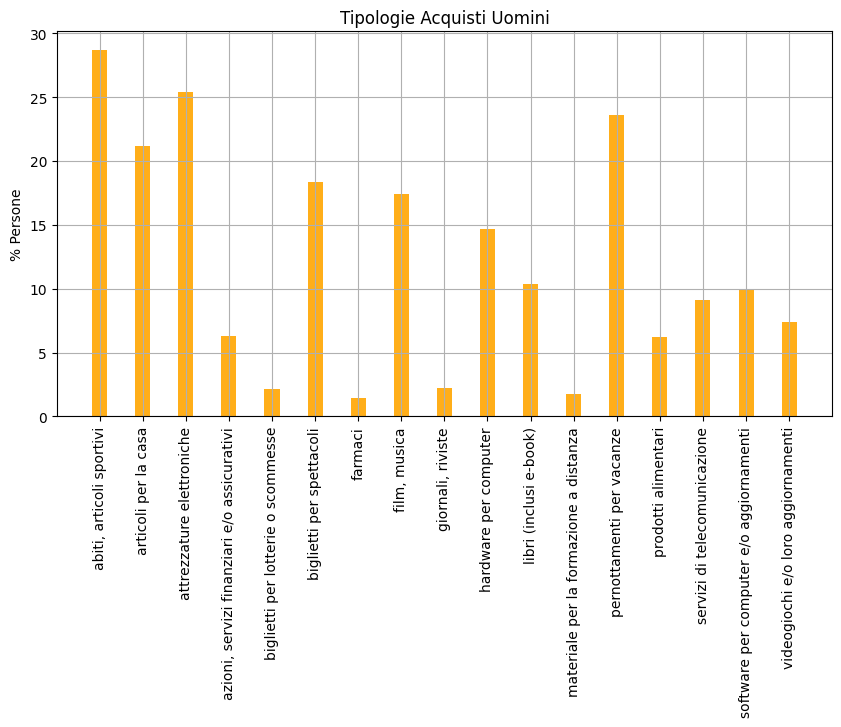

In [7]:
#Tipologie Acquisti Uomini
labels = categorie

plt.rc('figure', figsize=(10.0, 5.0))
fig, ax = plt.subplots()
width = 0.35 
plt.grid()
ax.bar(labels, Valori_uomini, width, label='Tipologie Acquisti Uomini', alpha = 0.9, color = 'orange')

plt.xticks(rotation='vertical')
ax.set_ylabel('% Persone')
ax.set_title('Tipologie Acquisti Uomini')
plt.show()

In [8]:
#Tipologia Acquisti Donne

df_donne = ordini[((ordini["Sesso"]=='femmine') & (ordini["Classe di età"]=="14 anni e più"))]
df_donne = df_donne.groupby("Tipo dato").mean()
df_donne = df_donne.drop(columns=["TIME"])
df_donne = df_donne.drop(["altro", 'altre spese di viaggio per vacanze'])
df_donne

C:\Users\gabri\AppData\Local\Temp\ipykernel_20732\176629229.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_donne = df_donne.groupby("Tipo dato").mean()


,Value
Tipo dato,
"abiti, articoli sportivi",33.266667
articoli per la casa,22.126667
attrezzature elettroniche,11.873333
"azioni, servizi finanziari e/o assicurativi",2.806667
biglietti per lotterie o scommesse,0.813333
biglietti per spettacoli,19.900000
farmaci,1.960000
"film, musica",12.320000
"giornali, riviste",1.700000


In [9]:
Valori_donne = df_donne["Value"].values.tolist()

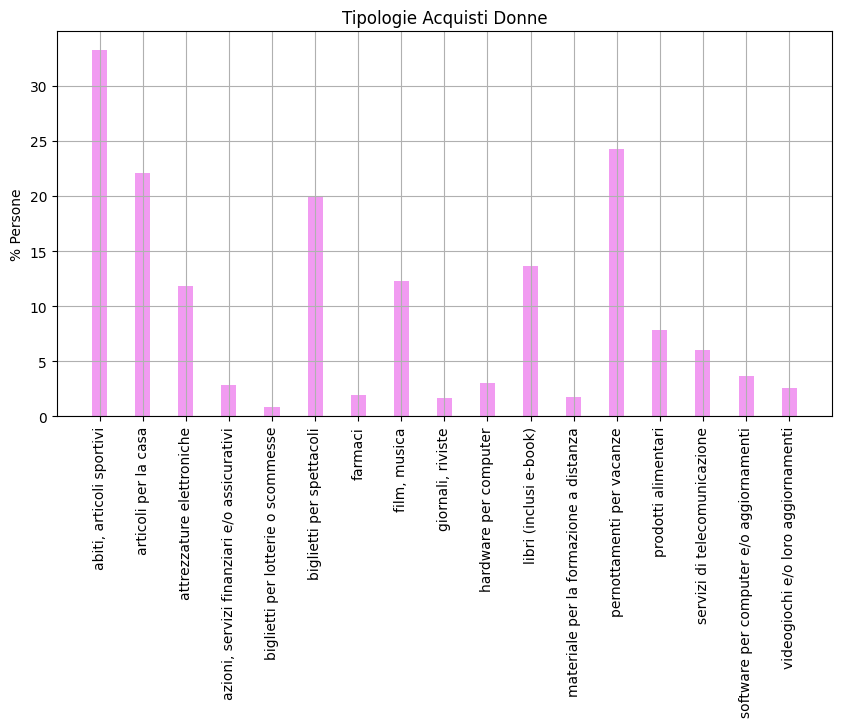

In [10]:
#Tipologie Acquisti Donne
labels = categorie

plt.rc('figure', figsize=(10.0, 5.0))
fig, ax = plt.subplots()
width = 0.35 
plt.grid()
ax.bar(labels, Valori_donne, width, label='Tipologie Acquisti Donne', alpha = 0.8, color='violet')

plt.xticks(rotation='vertical')
ax.set_ylabel('% Persone')
ax.set_title('Tipologie Acquisti Donne')
plt.show()

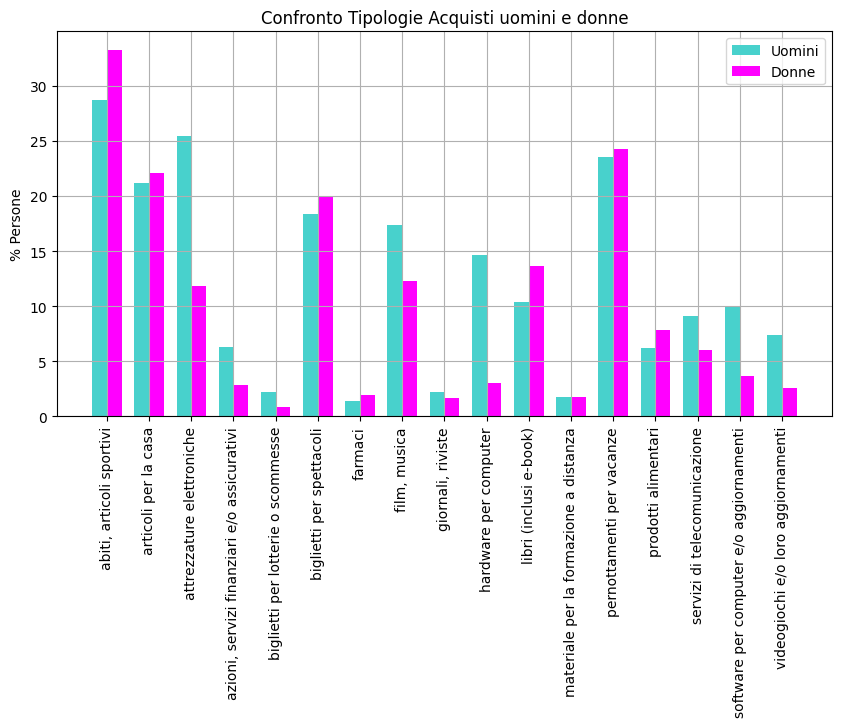

In [13]:
#Confronto Tipologie Acquisti uomini e donne
labels = categorie

plt.rc('figure', figsize=(10.0, 5.0))
fig, ax = plt.subplots()
width = 0.35 
plt.grid()

x = np.arange(len(labels))  # the label locations
ax.bar(x - width/2, Valori_uomini, width, label='Uomini', color = "mediumturquoise")
ax.bar(x + width/2, Valori_donne, width, label='Donne', color = "Magenta")
plt.xticks(rotation='vertical')
ax.set_ylabel('% Persone')
ax.set_title('Confronto Tipologie Acquisti uomini e donne')
ax.legend()
ax.set_xticks(x, labels)
plt.show()

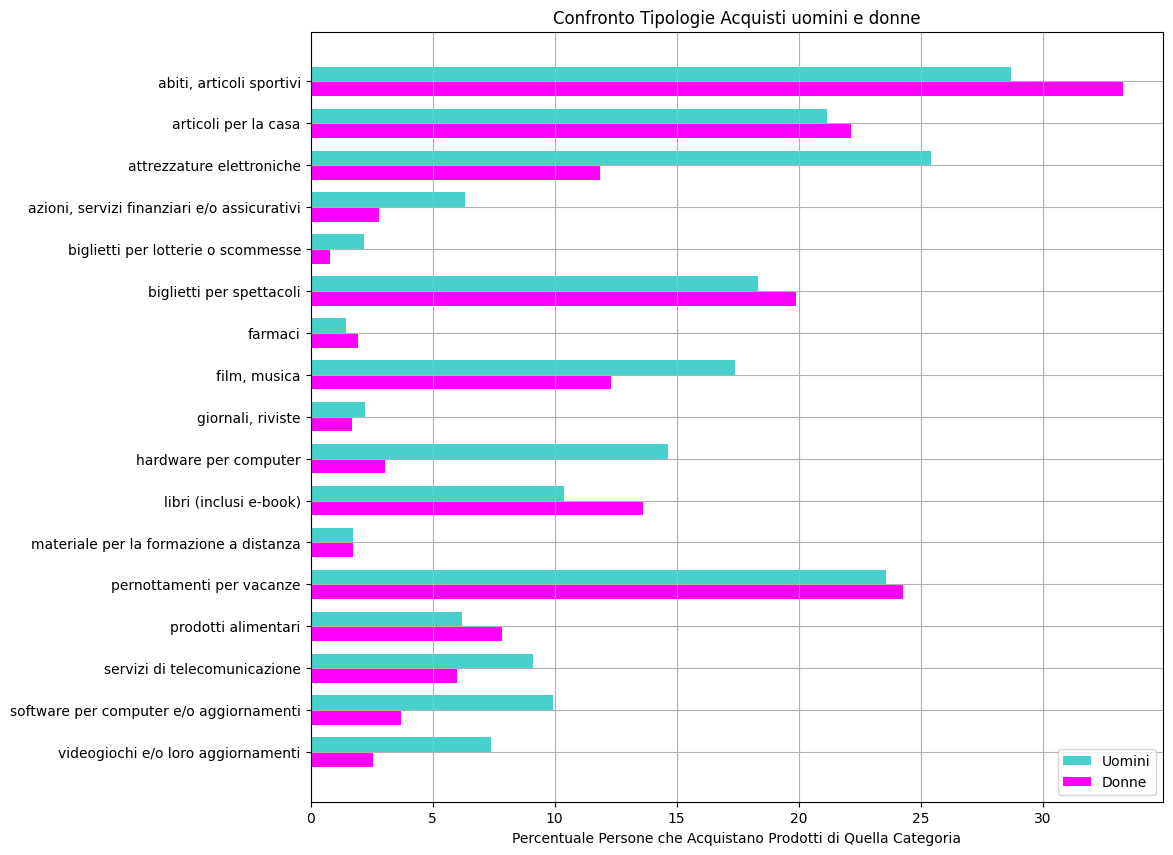

In [16]:
#Confronto Tipologie Acquisti uomini e donne
labels = categorie

plt.rc('figure', figsize=(11.0, 10.0))
fig, ax = plt.subplots()
width = 0.35 
plt.grid()

x = np.arange(len(labels))  # the label locations
ax.barh(x - width/2, Valori_uomini, width, label='Uomini', color = "mediumturquoise")
ax.barh(x + width/2, Valori_donne, width, label='Donne', color = "Magenta")
ax.set_xlabel('Percentuale Persone che Acquistano Prodotti di Quella Categoria')
ax.set_title('Confronto Tipologie Acquisti uomini e donne')
ax.invert_yaxis()  # labels read top-to-bottom
ax.legend()
ax.set_yticks(x, labels)
plt.show()